In [ ]:
# Lab 4 - DECISION TREE
# Yash Vadapalli
# 6507591

In [22]:
customers = pd.read_csv('customers.csv')

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [23]:
print(customers.head())

   CustomerID  Churn  Tenure        Device  CityTier     payment  Gender  \
0       50001      1     4.0  Mobile Phone         3  Debit Card  Female   
1       50002      1     NaN         Phone         1         UPI    Male   
2       50003      1     NaN         Phone         1  Debit Card    Male   
3       50004      1     0.0         Phone         3  Debit Card    Male   
4       50005      1     0.0         Phone         1          CC    Male   

   HourActive  DevicesRegistered            OrderCat  satisfaction  \
0         3.0                  3  Laptop & Accessory             2   
1         3.0                  4              Mobile             3   
2         2.0                  4              Mobile             3   
3         2.0                  4  Laptop & Accessory             5   
4         NaN                  3              Mobile             5   

  MaritalStatus  Complain  CouponUsed  OrderCount  DaySinceLastOrder  \
0        Single         1         1.0         1.0 

In [24]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5630 non-null   int64  
 1   Churn              5630 non-null   int64  
 2   Tenure             5366 non-null   float64
 3   Device             5630 non-null   object 
 4   CityTier           5630 non-null   int64  
 5   payment            5630 non-null   object 
 6   Gender             5630 non-null   object 
 7   HourActive         5375 non-null   float64
 8   DevicesRegistered  5630 non-null   int64  
 9   OrderCat           5630 non-null   object 
 10  satisfaction       5630 non-null   int64  
 11  MaritalStatus      5630 non-null   object 
 12  Complain           5630 non-null   int64  
 13  CouponUsed         5374 non-null   float64
 14  OrderCount         5372 non-null   float64
 15  DaySinceLastOrder  5323 non-null   float64
 16  CashbackAmount     5630 

In [25]:
print(customers.describe())

         CustomerID        Churn       Tenure     CityTier   HourActive  \
count   5630.000000  5630.000000  5366.000000  5630.000000  5375.000000   
mean   52815.500000     0.168384    10.189899     1.654707     2.931535   
std     1625.385339     0.374240     8.557241     0.915389     0.721926   
min    50001.000000     0.000000     0.000000     1.000000     0.000000   
25%    51408.250000     0.000000     2.000000     1.000000     2.000000   
50%    52815.500000     0.000000     9.000000     1.000000     3.000000   
75%    54222.750000     0.000000    16.000000     3.000000     3.000000   
max    55630.000000     1.000000    61.000000     3.000000     5.000000   

       DevicesRegistered  satisfaction     Complain   CouponUsed   OrderCount  \
count        5630.000000   5630.000000  5630.000000  5374.000000  5372.000000   
mean            3.688988      3.066785     0.284902     1.751023     3.008004   
std             1.023999      1.380194     0.451408     1.894621     2.939680   


In [26]:
col_names = ['CustomerID', 'Churn', 'Tenure', 'Device', 'CityTier', 'Payment', 'Gender', 
             'HourActive', 'DevicesRegistered', 'OrderCat', 'Satisfaction', 'MaritalStatus', 
             'Complain', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
customers = pd.read_csv("customers.csv", header=None, names=col_names)
customers = customers.iloc[1:]
customers.head(20)

CustomerID Churn Tenure        Device CityTier           Payment  Gender  \
1       50001     1      4  Mobile Phone        3        Debit Card  Female   
2       50002     1    NaN         Phone        1               UPI    Male   
3       50003     1    NaN         Phone        1        Debit Card    Male   
4       50004     1      0         Phone        3        Debit Card    Male   
5       50005     1      0         Phone        1                CC    Male   
6       50006     1      0      Computer        1        Debit Card  Female   
7       50007     1    NaN         Phone        3  Cash on Delivery    Male   
8       50008     1    NaN         Phone        1                CC    Male   
9       50009     1     13         Phone        3          E wallet    Male   
10      50010     1    NaN         Phone        1        Debit Card    Male   
11      50011     1      4  Mobile Phone        1  Cash on Delivery  Female   
12      50012     1     11  Mobile Phone        1        Debit Card    Male   
13      50013     1      0         Phone        1               COD    Male   
14      50014     1      0         Phone        1                CC    Male   
15      50015     1      9  Mobile Phone        3       Credit Card    Male   
16      50016     1    NaN         Phone        2               UPI    Male   
17      50017     1      0      Computer        1        Debit Card  Female   
18      50018     1      0  Mobile Phone        3          E wallet    Male   
19      50019     1      0      Computer        1        Debit Card    Male   
20      50020     1     19  Mobile Phone        1        Debit Card  Female   

   HourActive DevicesRegistered            OrderCat Satisfaction  \
1           3                 3  Laptop & Accessory            2   
2           3                 4              Mobile            3   
3           2                 4              Mobile            3   
4           2                 4  Laptop & Accessory            5   
5         NaN                 3              Mobile            5   
6           3                 5        Mobile Phone            5   
7           2                 3  Laptop & Accessory            2   
8           3                 3              Mobile            2   
9         NaN                 4              Mobile            3   
10          2                 5              Mobile            3   
11          2                 3              Others            3   
12          3                 4             Fashion            3   
13          2                 3              Mobile            3   
14          3                 4              Mobile            3   
15          3                 4             Fashion            2   
16          3                 3              Mobile            5   
17        NaN                 4              Mobile            2   
18          2                 4  Laptop & Accessory            3   
19          3                 5  Laptop & Accessory            3   
20          3                 3        Mobile Phone            4   

   MaritalStatus Complain CouponUsed OrderCount DaySinceLastOrder  \
1         Single        1          1          1                 5   
2         Single        1          0          1                 0   
3         Single        1          0          1                 3   
4         Single        0          0          1                 3   
5         Single        0          1          1                 3   
6         Single        1          4          6                 7   
7       Divorced        0          0          1                 0   
8       Divorced        1          2          2                 0   
9       Divorced        1          0          1                 2   
10        Single        0          1          1                 1   
11      Divorced        0          9         15                 8   
12        Single        1          0          1                 0   
13        Single 

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

customers = pd.read_csv('customers.csv')

numerical_features = customers.select_dtypes(include=['float64', 'int64'])

label_encoders = {}
customers = customers.drop(columns=['CustomerID'])

# label encoding to categorical columns
categorical_cols = ['Device', 'payment', 'Gender', 'OrderCat', 'MaritalStatus']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    customers[col] = label_encoders[col].fit_transform(customers[col])

# StandardScaler
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(numerical_features)
standard_scaled_df = pd.DataFrame(standard_scaled_data, columns=numerical_features.columns)

# MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(numerical_features)
min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=numerical_features.columns)

# RobustScaler
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(numerical_features)
robust_scaled_df = pd.DataFrame(robust_scaled_data, columns=numerical_features.columns)

In [50]:
X = customers.drop(columns=['Churn'])  #Features
y = customers['Churn']  #Target class

In [51]:
# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3941, 15)
y_train shape: (3941,)
X_test shape: (1689, 15)
y_test shape: (1689,)


In [52]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [53]:
from sklearn.tree import export_text

# Assuming clf is your trained DecisionTreeClassifier
text_representation = export_text(clf, feature_names=list(X.columns))
print(text_representation)

|--- Tenure <= 1.50
|   |--- Complain <= 0.50
|   |   |--- satisfaction <= 2.50
|   |   |   |--- CashbackAmount <= 111.50
|   |   |   |   |--- class: 1
|   |   |   |--- CashbackAmount >  111.50
|   |   |   |   |--- OrderCount <= 8.50
|   |   |   |   |   |--- DevicesRegistered <= 3.50
|   |   |   |   |   |   |--- DaySinceLastOrder <= 0.50
|   |   |   |   |   |   |   |--- OrderCat <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- OrderCat >  2.50
|   |   |   |   |   |   |   |   |--- payment <= 5.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- payment >  5.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DaySinceLastOrder >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DevicesRegistered >  3.50
|   |   |   |   |   |   |--- CashbackAmount <= 136.50
|   |   |   |   |   |   |   |--- HourActive <= 3.50
|   |   |   |   |   |   |   |   |--- CouponUsed <= 0.5

In [40]:
!pip install graphviz
!pip install pydotplus

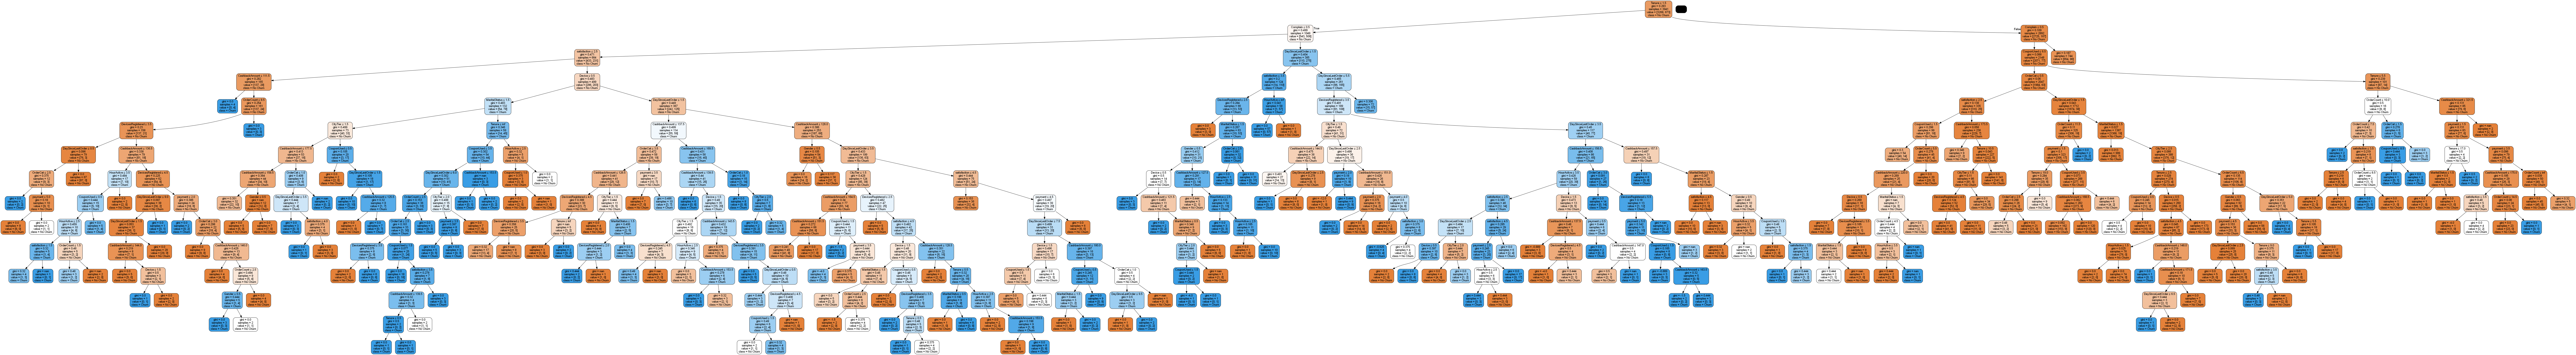

In [54]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

# Assuming clf is your trained DecisionTreeClassifier and feature_names is a list of feature names
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names=list(X.columns),
                class_names=['No Churn', 'Churn']) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [ ]:
# Plot decision surface here

In [55]:
# Analyzing the tree
print(f'Max depth: {clf.get_depth()}')
print(f'Number of leaves: {clf.get_n_leaves()}')
print(f'Feature weights: {clf.feature_importances_}')

Max depth: 14
Number of leaves: 221
Feature weights: [       nan 0.00678433        nan        nan        nan        nan
        nan        nan        nan        nan 0.01057986        nan
        nan 0.01495118        nan]


In [56]:
# Define the instance to predict
instance = { 
    'Tenure': 4,
    'Device': 'Mobile Phone',
    'CityTier': 3,
    'payment': 'Debit Card',
    'Gender': 'Female',
    'HourActive': 3,
    'DevicesRegistered': 3,
    'OrderCat': 'Laptop & Accessory',
    'satisfaction': 2,
    'MaritalStatus': 'Single',
    'Complain': 1,
    'CouponUsed': 1,
    'OrderCount': 5,
    'DaySinceLastOrder': 5,
    'CashbackAmount': 160
}

# Identify categorical features by their data types
categorical_features = ['Device', 'payment', 'Gender', 'OrderCat', 'MaritalStatus']

# Start at the root node
current_node = 0

# Traverse the tree based on the instance features
while True:
    feature_index = clf.tree_.feature[current_node]
    threshold = clf.tree_.threshold[current_node]
    
    # Check if the feature is categorical
    if X.columns[feature_index] in categorical_features:
        feature_value = instance[X.columns[feature_index]]
    else:
        feature_value = instance[X.columns[feature_index]]
    
    # Traverse the tree based on the feature value
    if feature_value <= threshold:
        next_node = clf.tree_.children_left[current_node]
    else:
        next_node = clf.tree_.children_right[current_node]

    # If next node is a leaf, make a prediction
    if clf.tree_.feature[next_node] == -2:
        predicted_class = 1 if clf.tree_.value[next_node][0][1] > clf.tree_.value[next_node][0][0] else 0
        break
    
    current_node = next_node

# Print the predicted class
print("Predicted class for the instance:", predicted_class)

Predicted class for the instance: 0


In [57]:
y_pred = clf.predict(X_test[0:3])
y_pred

array([1, 0, 0], dtype=int64)

In [58]:
# get prediction on the Entire test data and save it into y_pre
y_pred = clf.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
print("Accuracy of test:",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Train Accuracy : 0.9375792945952803
Accuracy of test: 0.9058614564831261


array([[1382,   32],
       [ 127,  148]], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp) #true negative, false positive, false negative, true positive

(1382, 32, 127, 148)

In [63]:
!pip install seaborn

                   CustomerID     Churn    Tenure  CityTier  HourActive  \
CustomerID           1.000000 -0.019083  0.029952  0.003239    0.598417   
Churn               -0.019083  1.000000 -0.349408  0.084703    0.018675   
Tenure               0.029952 -0.349408  1.000000 -0.060688   -0.021226   
CityTier             0.003239  0.084703 -0.060688  1.000000   -0.009150   
HourActive           0.598417  0.018675 -0.021226 -0.009150    1.000000   
DevicesRegistered    0.411098  0.107939 -0.023983  0.027934    0.316800   
satisfaction        -0.033146  0.105481 -0.013903 -0.011554    0.031858   
Complain            -0.009944  0.250188 -0.021268  0.003375    0.006976   
CouponUsed           0.234302 -0.008264  0.129035  0.021456    0.191528   
OrderCount           0.139008 -0.028697  0.186403  0.033388    0.109575   
DaySinceLastOrder    0.113243 -0.160757  0.184552  0.017525    0.075716   
CashbackAmount       0.217173 -0.154161  0.476577  0.055698    0.121469   

                   Devic

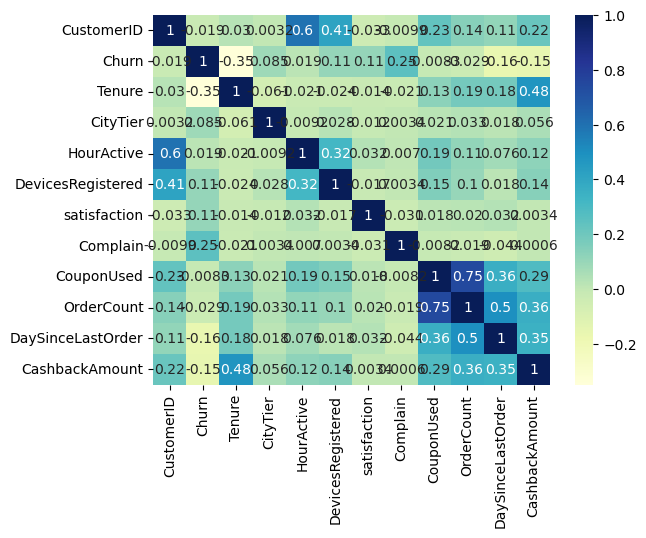

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

customers = pd.read_csv("customers.csv")
print(customers.corr(numeric_only=True))
dataplot = sns.heatmap(customers.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# Step 13: Re-evaluating the features

In [76]:
feature_correlations = customers.corr(numeric_only=True)['Churn'].abs().sort_values(ascending=False)
top_features = feature_correlations[1:6].index  # Exclude 'Churn' itself and select top 5 features
new_features_matrix = customers[top_features]

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_new = new_features_matrix
y_new = customers['Churn']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

clf_new = DecisionTreeClassifier(random_state=42)
clf_new.fit(X_train_new, y_train_new)

y_pred_new = clf_new.predict(X_test_new)

accuracy = accuracy_score(y_test_new, y_pred_new)
print("Accuracy using top N correlated features:", accuracy)

Accuracy using top N correlated features: 0.8768502072232089


In [80]:
# Step 14: Training and test data size 

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

customers_encoded = pd.get_dummies(customers, columns=['Device', 'payment', 'Gender', 'OrderCat', 'MaritalStatus'])

X_encoded = customers_encoded.drop(columns=['Churn'])
y_encoded = customers_encoded['Churn']

# Vary the training data size and observe the impact on accuracy
train_sizes = [0.6, 0.7, 0.8, 0.9]
for size in train_sizes:
    # Split the data into training and test sets with the current size
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=1 - size, random_state=42)
    
    # Initialize and train the decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the training size and accuracy
    print(f"Training Size: {size}, Test Size: {1 - size}, Accuracy: {accuracy}")

Training Size: 0.6, Test Size: 0.4, Accuracy: 0.8960923623445826
Training Size: 0.7, Test Size: 0.30000000000000004, Accuracy: 0.8958579881656805
Training Size: 0.8, Test Size: 0.19999999999999996, Accuracy: 0.9076376554174067
Training Size: 0.9, Test Size: 0.09999999999999998, Accuracy: 0.8952042628774423


In [ ]:
# Explanation:
# The train_test_split function helps make separate sets of data for training and testing. 
# We train the decision tree model using the training data and check how well it works using the test data. 
# Changing the size of the training data lets us see how accurate our model is, 
# helping us find the best amount of data to train on for our specific situation.

In [ ]:
# Step 15: Parameter Training

In [82]:
# Step 15.1
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = customers.drop(columns=['Churn'])
y = customers['Churn']

# Split the data into training and validation sets
# X_train and y_train are your training data, and X_validation and y_validation are your validation data
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Step 15.2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

customers = pd.read_csv("customers.csv")

y = customers['Churn']
X = customers.drop(columns=['Churn'])

X_encoded = pd.get_dummies(X, columns=['Device', 'payment', 'Gender', 'OrderCat', 'MaritalStatus'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

parameters = [3,5,7,10]

dfs = []

for param_value in parameters:
    clf = DecisionTreeClassifier(max_depth=param_value)
    clf.fit(X_train, y_train)
    training_accuracy = accuracy_score(y_train, clf.predict(X_train))
    validation_accuracy = accuracy_score(y_test, clf.predict(X_test))
    dfs.append(pd.DataFrame({'Parameter': [param_value], 
                             'Training Accuracy': [training_accuracy], 
                             'Validation Accuracy': [validation_accuracy]}))

df = pd.concat(dfs, ignore_index=True)

print(df)

   Parameter  Training Accuracy  Validation Accuracy
0          3           0.872114             0.877442
1          5           0.886767             0.889876
2          7           0.902309             0.891652
3         10           0.942052             0.907638


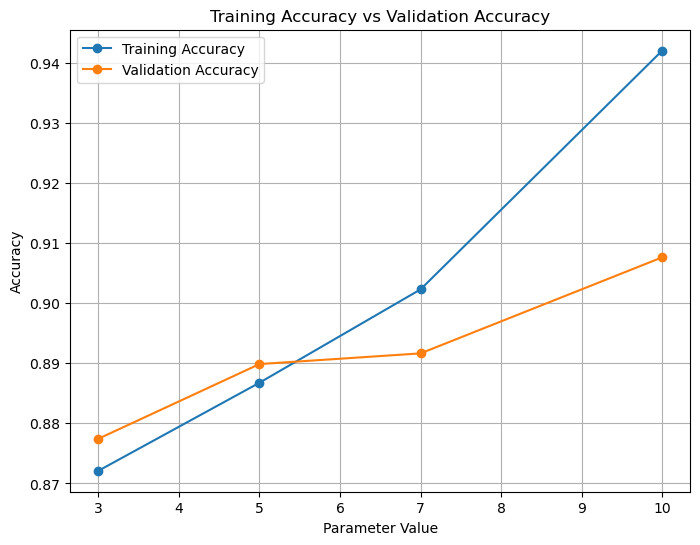

In [91]:
# Step 15.3
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(df['Parameter'], df['Training Accuracy'], marker='o', label='Training Accuracy')
plt.plot(df['Parameter'], df['Validation Accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('Parameter Value')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Explanation:
# This code helps visualize how the model's accuracy changes with different parameter values, 
# making it easier to choose the best parameter for the model.

In [ ]:
# Step 16: To apply binning to columns in customers dataset and assess the impact on accuracy

In [103]:
# Binning:
import pandas as pd

# Define bin edges and labels for each column
tenure_bins = [0, 2, 5, float('inf')]
tenure_labels = ['New', 'Regular', 'Long-term']
customers['TenureCategory'] = pd.cut(customers['Tenure'], bins=tenure_bins, labels=tenure_labels)

hour_bins = [0, 5, 10, float('inf')]
hour_labels = ['Low Activity', 'Moderate Activity', 'High Activity']
customers['HourActiveCategory'] = pd.cut(customers['HourActive'], bins=hour_bins, labels=hour_labels)

devices_bins = [0, 1, float('inf')]
devices_labels = ['Single Device User', 'Multiple Device User']
customers['DevicesCategory'] = pd.cut(customers['DevicesRegistered'], bins=devices_bins, labels=devices_labels)

order_bins = [0, 3, 7, float('inf')]
order_labels = ['Infrequent Buyers', 'Regular Buyers', 'Frequent Buyers']
customers['OrderCountCategory'] = pd.cut(customers['OrderCount'], bins=order_bins, labels=order_labels)

days_bins = [0, 3, 7, float('inf')]
days_labels = ['Recent Buyers', 'Average Buyers', 'Inactive Buyers']
customers['DaysSinceLastOrderCategory'] = pd.cut(customers['DaySinceLastOrder'], bins=days_bins, labels=days_labels)

In [104]:
#Training and testing the model again after binning:
X_binned = customers[['TenureCategory', 'HourActiveCategory', 'DevicesCategory', 'OrderCountCategory', 'DaysSinceLastOrderCategory']]
X_binned_encoded = pd.get_dummies(X_binned, drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a target variable y defined
X_train, X_test, y_train, y_test = train_test_split(X_binned_encoded, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_with_binning = accuracy_score(y_test, y_pred)

print("Accuracy with Binning:", accuracy_with_binning)

Accuracy with Binning: 0.8383658969804618


In [106]:
# Accuracy without binning
accuracy_without_binning = 0.8960923623445826

# Accuracy with binning
accuracy_with_binning = 0.8383658969804618

# Calculate the difference in accuracies
accuracy_difference = accuracy_with_binning - accuracy_without_binning

# Print the results
print("Accuracy without Binning:", accuracy_without_binning)
print("Accuracy with Binning:", accuracy_with_binning)
print("Accuracy Difference (With Binning - Without Binning):", accuracy_difference)

Accuracy without Binning: 0.8960923623445826
Accuracy with Binning: 0.8383658969804618
Accuracy Difference (With Binning - Without Binning): -0.05772646536412074


In [ ]:
# Explanation:
# The accuracy without binning was 0.8960923623445826, while with binning, it decreased slightly to 0.8383658969804618. 
# The accuracy difference (With Binning - Without Binning) was -0.05772646536412074, 
# indicating a slight decrease in accuracy after implementing the binning technique.

# So therefore,
# In comparing the accuracy values before and after implementing the binning technique, 
# the accuracy slightly decreased. The new accuracy value (0.8383658969804618) is lower than the initial accuracy 
# value (0.8960923623445826). Therefore, there is a difference between the new accuracy value and the initial accuracy value, 
# and it did not improve; it decreased slightly.